## Permutation Tests (Randomization Test)

In a permutation test we permute (think shuffle) the observed data by assigning them to the different outcome variables, sticking to the same ratio of outcome variables as in the original sample. Unlike, bootstrapping, the sampling is done without replacement.

By doing this we can build if a distribution the parameter in the null scenario and then compare our own observed statistic to see when it lies in the distribution.

An example is presented here. The data was obtained from a test question in the Udacity Data Science Nanodegree Program.

In the example, a data file contains 5000 samples broken down into a control (condition = 0) and experimental (condition = 1) group. Time taken for a webpage to upload is measured for every observation. We are interested in improving some of the worst cases so we focus on teh 90th percentile in this example.


In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from statsmodels.stats import proportion as proptests
import random

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('./data/permutation_data.csv')
data.head(10)

,condition,time
0,0,5940
1,0,666
2,1,571
3,1,779
4,0,1928
5,0,3791
6,0,736
7,1,8482
8,0,4594
9,0,1171


In [7]:
data.shape

(5000, 2)

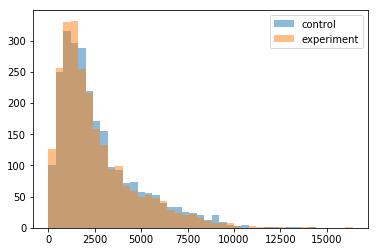

In [9]:
# data visualization
bin_borders = np.arange(0, data['time'].max()+400, 400)
plt.hist(data[data['condition'] == 0]['time'], alpha = 0.5, bins = bin_borders)
plt.hist(data[data['condition'] == 1]['time'], alpha = 0.5, bins = bin_borders)
plt.legend(labels = ['control', 'experiment']);

In [53]:
# Just how different are the two distributions' 90th percentiles?
percentile_90_con_0 = np.percentile(data[data['condition'] == 0]['time'], 90)
percentile_90_con_1 = np.percentile(data[data['condition'] == 1]['time'], 90)
print("90th percentile of the control (0) group:", percentile_90_con_0)
print("90th percentile of the experimental (1) group:", percentile_90_con_1)

90th percentile of the control (0) group: 5809.199999999999
90th percentile of the experimental (1) group: 5492.2


In [57]:
n_trials = 10000
percentile = 90

In [37]:

len(random_exp)

2470

In [69]:
#get size of the control and experiental groups
num_control = data[data['condition'] == 0].shape[0]
num_experimental = data[data['condition'] == 1].shape[0]

# initialize storage of bootstrapped sample quantiles
permutation_diffs = []

# For each trial (or we could call it a permutation)
for _ in range(n_trials):
    # randomly permute the grouping labels
    shuffle = np.random.choice(data['time'], num_control+num_experimental, replace=False)
    random_control = shuffle[:num_control]
    random_exp = shuffle[num_control:num_control+num_experimental]

    # compute the difference in percentiles
    difference = np.percentile(random_control, q = percentile ) - np.percentile(random_exp, q = percentile )

    # and add the value to the list of sampled differences
    permutation_diffs.append(difference)

# compute observed statistic
observed_diff = percentile_90_con_0 - percentile_90_con_1



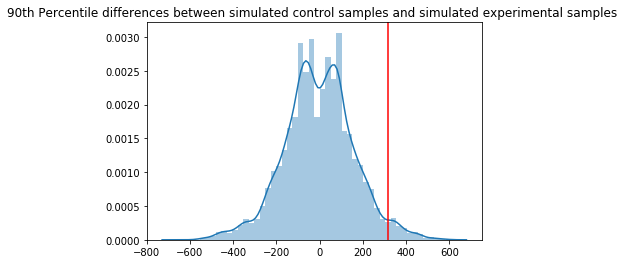

In [70]:
ax = sns.distplot(permutation_diffs, kde=True, norm_hist=True  )
ax.set_title("90th Percentile differences between simulated control samples and simulated experimental samples ")

#Draw a line on the plot where our observed difference between control and experiental group lies
ax.axvline(observed_diff, color='red')

*The histogram above plots the distribution of differences between the simulated control groups and the simulated experimental groups.*

*We can call this the null distribution. It reflects the distribution if we are to assume that the variance observed is truly the variance of the null distribution and that our observed delta between the control and experiental group is simply, by chance, an extreme case.*

*The location of the observed difference bewteen the groups 90th percentiles is marked with a red vertical line.*

In [71]:
#one sided test to calculate the p_score
above_observed = (permutation_diffs >= observed_diff).sum()

In [72]:
p_score = above_observed/n_trials
print("p_score of the observed difference:", p_score)

p_score of the observed difference: 0.0316
